In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from funciones import *

# Statistics plot

In [4]:
data1 =np.load("./data/K=10^8_n=1_mu=10^-4.npy")
data2 =np.load('./data/K=10^8, n=1, mu=10^2.npy')

In [26]:
K = 10**8
n = 1
mu = 10**-4

delta1 = np.log(K)/(mu+np.sqrt(2*K*mu))
deltas = [delta1*0.01, delta1, delta1*10**(5/2), delta1*10**3]
labels = ['$\Delta=10^{-2}\Delta_1^*$','$\Delta=\Delta_1^*$','$\Delta=10^{5/2}\Delta_1^*$', '$\Delta=10^3\Delta_1^*$']

mu2 = 10**2

delta2 = np.log(K)/(mu2+np.sqrt(2*K*mu2))
deltas2 = [delta2/2, delta2, delta2*2, delta2*5]
labels2 = ['$\Delta=\Delta^*/2$','$\Delta=\Delta^*$','$\Delta=2\Delta^*$', '$\Delta=5\Delta^*$']

S ans T plot for Delta = $\Delta=10^{-2}\Delta_1^*$ done for mu = 1E-04


S ans T plot for Delta = $\Delta=\Delta_1^*$ done for mu = 1E-04
S ans T plot for Delta = $\Delta=10^{5/2}\Delta_1^*$ done for mu = 1E-04
S ans T plot for Delta = $\Delta=10^3\Delta_1^*$ done for mu = 1E-04
S ans T plot for Delta = $\Delta=\Delta^*/2$ done for mu = 1E+02
S ans T plot for Delta = $\Delta=\Delta^*$ done for mu = 1E+02
S ans T plot for Delta = $\Delta=2\Delta^*$ done for mu = 1E+02
S ans T plot for Delta = $\Delta=5\Delta^*$ done for mu = 1E+02


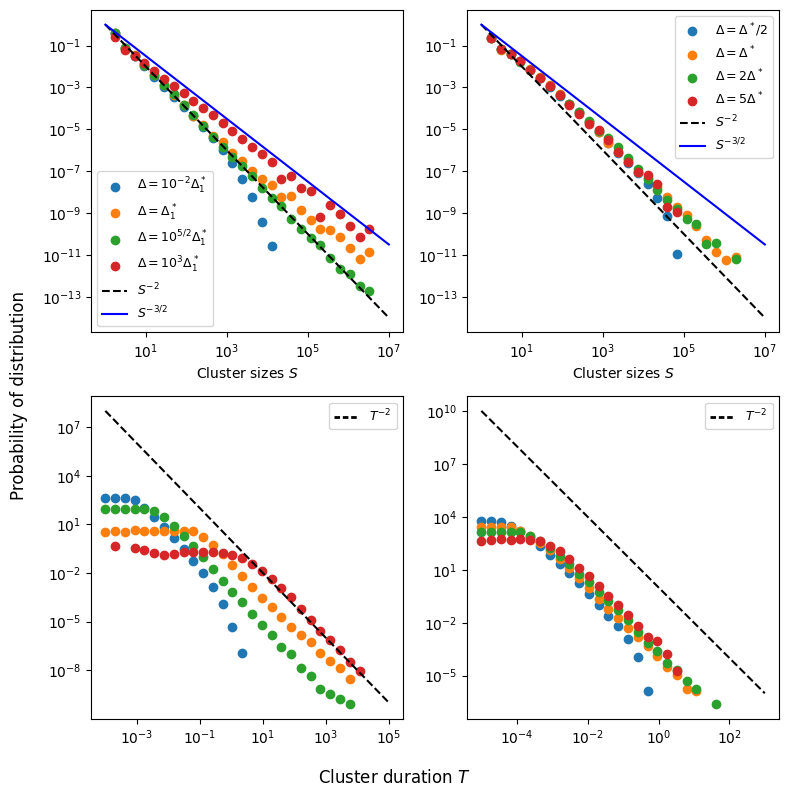

In [27]:
fig = plt.figure(figsize=(8, 8))
axgrid = fig.add_gridspec(2,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[1,0])
ax2 = fig.add_subplot(axgrid[0,1])
ax3 = fig.add_subplot(axgrid[1,1])

s_bins = np.logspace(0, 7, num = 30, base = 10)
t_bins = np.logspace(-4, 5, num = 30, base = 10)

for i in range(len(deltas)):
    clusters = identify_clusters(data1[0,:], deltas[i])
    cluster_sizes = [len(cluster) for cluster in clusters]
    cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

    s_hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
    ax0.scatter(s_bins[:-1], s_hist[0], label=labels[i])
    
    t_hist = np.histogram(cluster_times, bins=t_bins, density = True)
    ax1.scatter(t_bins[:-1], t_hist[0], label=labels[i])
    
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-6
y_s2 = s_bins**(-3/2)

ax0.plot(s_bins, y_s, label='$S^{-2}$', color='black', linestyle='--')
ax1.plot(t_bins, y_t, label='$T^{-2}$', color='black', linestyle='--')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$', color='blue')

t_bins = np.logspace(-5, 3, num = 30, base = 10)

for i in range(len(deltas2)):
    clusters = identify_clusters(data2[0,:], deltas2[i])
    cluster_sizes = [len(cluster) for cluster in clusters]
    cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

    s_hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
    ax2.scatter(s_bins[:-1], s_hist[0], label=labels2[i])

    t_hist = np.histogram(cluster_times, bins=t_bins, density = True)    
    ax3.scatter(t_bins[:-1], t_hist[0], label=labels2[i])

    print(f'S ans T plot for Delta = {labels2[i]} done for mu = {mu2:.0E}')
 
ax0.set_xscale('log')
ax0.set_yscale('log')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax3.set_xscale('log')
ax3.set_yscale('log')

y_t = t_bins**(-2)*10**-6
ax2.plot(s_bins, y_s, label='$S^{-2}$', color='black', linestyle='--')
ax2.plot(s_bins, y_s2, label='$S^{-3/2}$', color='blue')
ax3.plot(t_bins, y_t, label='$T^{-2}$', color='black', linestyle='--')

fig.supylabel('Probability of distribution')
fig.supxlabel('Cluster duration $T$')
fig.axes[0].legend(loc = 'best', fontsize = 9)
fig.axes[2].legend(loc = 'best', fontsize = 9)

fig.axes[1].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=2, linestyle='--')], labels=['$T^{-2}$'], loc = 'upper right', fontsize = 9)
fig.axes[3].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=2, linestyle='--')], labels=['$T^{-2}$'], loc = 'upper right', fontsize = 9 )

fig.axes[0].set_xlabel('Cluster sizes $S$')
fig.axes[2].set_xlabel('Cluster sizes $S$')

fig.tight_layout()
fig.savefig('statistics.png')


# Percolation strength plots

In [2]:
R = 10**3
deltas = np.load(f'./data/deltas_R=1_article.npy')
n = 0
mu = 1
percolations_means_mu1 = [np.load(f'./data/percolation_means_n={n}_mu={mu}_K={K},R={R}.npy') for K in [10**3, 10**4, 10**5]]
n = 1
mu = 10**-4
percolations_means_mu2 = [np.load(f'./data/percolation_means_n={n}_mu={mu}_K={K},R={R}.npy') for K in [10**3, 10**4, 10**5]]
mu = 10**2
percolations_means_mu3 = [np.load(f'./data/percolation_means_n={n}_mu={mu}_K={K},R={R}.npy') for K in [10**3, 10**4, 10**5]]


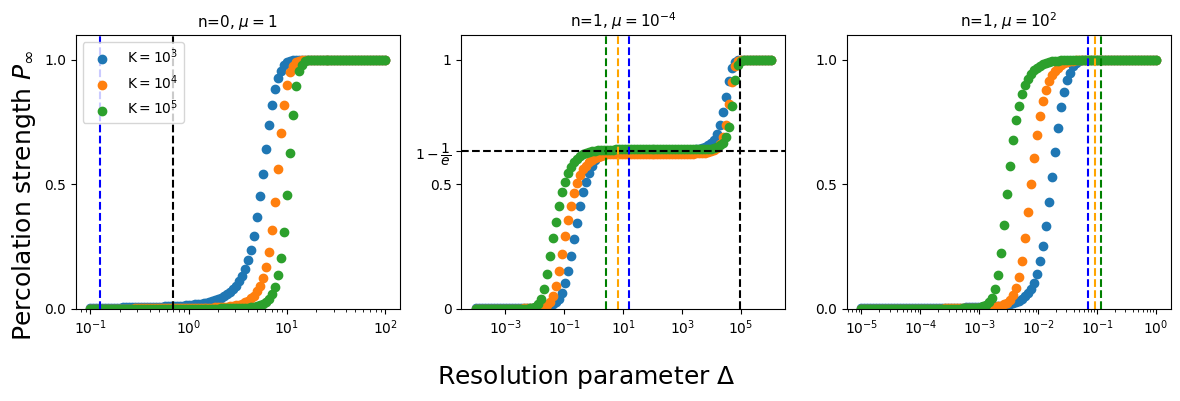

In [3]:
ns =[0, 1, 1]
mus = [1, 10**-4, 10**2]
titles = ['n=0, $\mu=1$', 'n=1, $\mu=10^{-4}$', 'n=1, $\mu=10^2$']
labels = ['K$=10^3$', 'K$=10^4$', 'K$=10^5$']

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    fig.axes[0].scatter(deltas[0], percolations_means_mu1[i], label=labels[i])
    fig.axes[1].scatter(deltas[1], percolations_means_mu2[i], label=labels[i])
    fig.axes[2].scatter(deltas[2], percolations_means_mu3[i], label=labels[i])

fig.axes[0].legend(loc = 'upper left')
#fig.axes[1].annotate('1-$\dfrac{1}{e}$', xy=(0.01, 1-1/np.exp(1)), xytext=(0.01, 1-1/np.exp(1)+0.1))
    

for ax in axs:
    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)
    ax.set_yticks([0, 0.5, 1])
    ax.set_title(titles[axs.tolist().index(ax)], fontsize =11)

fig.axes[1].set_yticks([0, 0.5, 1-1/np.exp(1),1 ])
fig.axes[1].set_yticklabels([0, 0.5, '$1-\dfrac{1}{e}$',1])
fig.axes[1].axhline(1-1/np.exp(1), color='black', linestyle='--')

fig.axes[1].vlines(np.log(10**4)/(10**-4), 0, 1.1, color='black', linestyle='--')
fig.axes[1].vlines(np.log(10**3)/(10**-4+np.sqrt(10**-4*2*10**3)), 0, 1.1, color='blue', linestyle='--')
fig.axes[1].vlines(np.log(10**4)/(10**-4+np.sqrt(10**-4*2*10**4)), 0, 1.1, color='orange', linestyle='--')
fig.axes[1].vlines(np.log(10**5)/(10**-4+np.sqrt(10**-4*2*10**5)), 0, 1.1, color='green', linestyle='--')


"""#Valores de delta del artículo
fig.axes[1].vlines(0.001*np.log(10**4)/(10**-4+np.sqrt(10**-4*2*10**3)), 0, 1.1, color='blue', linestyle='--')
fig.axes[1].vlines(np.log(10**4)/(10**-4+np.sqrt(10**-4*2*10**4)), 0, 1.1, color='orange', linestyle='--')
fig.axes[1].vlines(10**2.5*np.log(10**4)/(10**-4+np.sqrt(10**-4*2*10**5)), 0, 1.1, color='green', linestyle='--')
fig.axes[1].vlines(10**3*np.log(10**4)/(10**-4+np.sqrt(10**-4*2*10**5)), 0, 1.1, color='black', linestyle='--')
"""
fig.axes[2].vlines(np.log(10**3)/(10**2), 0, 1.1, color='blue', linestyle='--')
fig.axes[2].vlines(np.log(10**4)/(10**2), 0, 1.1, color='orange', linestyle='--')
fig.axes[2].vlines(np.log(10**5)/(10**2), 0, 1.1, color='green', linestyle='--')




"""#Valores de delta del artículo
fig.axes[2].vlines(0.5*np.log(10**8)/(10**2), 0, 1.1, color='black', linestyle='--')
fig.axes[2].vlines(1*np.log(10**8)/(10**2), 0, 1.1, color='red', linestyle='--')
fig.axes[2].vlines(3*np.log(10**8)/(10**2), 0, 1.1, color='pink', linestyle='--')
fig.axes[2].vlines(5*np.log(10**8)/(10**2), 0, 1.1, color='yellow', linestyle='--')
"""

fig.supylabel('Percolation strength $P_{\infty}$', fontsize = 18)
fig.supxlabel('Resolution parameter $\Delta$', fontsize = 18)
fig.tight_layout()

# $\chi$

In [5]:
R = 10**3
deltas = np.load(f'./data/deltas_R=1_article.npy')
n = 0
mu = 1
percolations_sus_mu1 = [np.load(f'./data/percolation_susceptibility_n={1}_mu={mu}_K={K},R={R}.npy') for K in [10**3, 10**4, 10**5]]
n = 1
mu = 10**-4
percolations_sus_mu2 = [np.load(f'./data/percolation_susceptibility_n={n}_mu={mu}_K={K},R={R}.npy') for K in [10**3, 10**4, 10**5]]
mu = 10**2
percolations_sus_mu3 = [np.load(f'./data/percolation_susceptibility_n={n}_mu={mu}_K={K},R={R}.npy') for K in [10**3, 10**4, 10**5]]

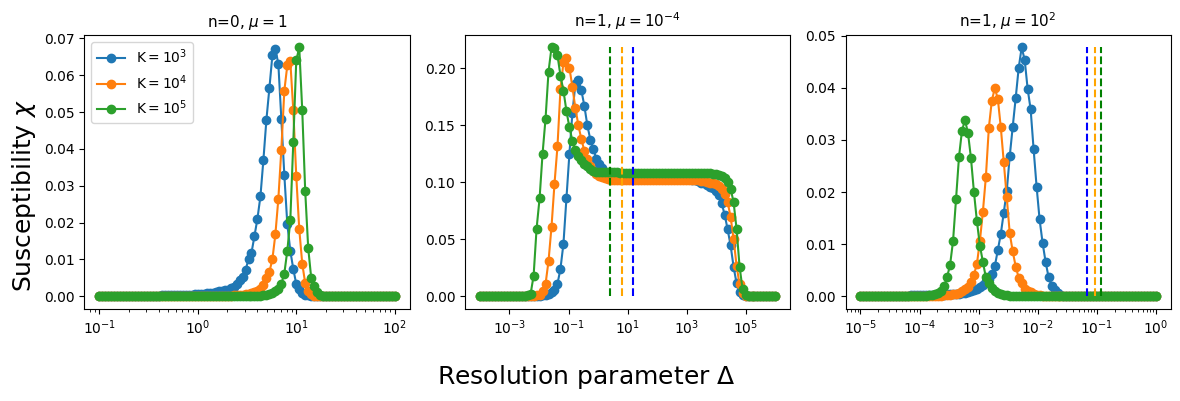

In [21]:
ns =[0, 1, 1]
mus = [1, 10**-4, 10**2]
titles = ['n=0, $\mu=1$', 'n=1, $\mu=10^{-4}$', 'n=1, $\mu=10^2$']
labels = ['K$=10^3$', 'K$=10^4$', 'K$=10^5$']

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    fig.axes[0].plot(deltas[0], percolations_sus_mu1[i], marker = 'o', label=labels[i])
    fig.axes[1].plot(deltas[1], percolations_sus_mu2[i], marker = 'o', label=labels[i])
    fig.axes[2].plot(deltas[2], percolations_sus_mu3[i], marker = 'o', label=labels[i])

fig.axes[0].legend(loc = 'upper left')
#fig.axes[1].annotate('1-$\dfrac{1}{e}$', xy=(0.01, 1-1/np.exp(1)), xytext=(0.01, 1-1/np.exp(1)+0.1))
    

for ax in axs:
    ax.set_xscale('log')
    ax.set_title(titles[axs.tolist().index(ax)], fontsize =11)

fig.axes[1].vlines(np.log(10**3)/(0.0001+np.sqrt(0.0001*1000*2)), 0, max(percolations_sus_mu2[2]), color='blue', linestyle='--')
fig.axes[1].vlines(np.log(10**4)/(0.0001+np.sqrt(0.0001*10000*2)), 0, max(percolations_sus_mu2[2]), color='orange', linestyle='--')
fig.axes[1].vlines(np.log(10**5)/(0.0001+np.sqrt(0.0001*100000*2)), 0, max(percolations_sus_mu2[2]), color='green', linestyle='--')

fig.axes[2].vlines(np.log(10**3)/(10**2), 0, max(percolations_sus_mu3[0]), color='blue', linestyle='--')
fig.axes[2].vlines(np.log(10**4)/(10**2), 0, max(percolations_sus_mu3[0]), color='orange', linestyle='--')
fig.axes[2].vlines(np.log(10**5)/(10**2), 0, max(percolations_sus_mu3[0]), color='green', linestyle='--')


fig.supylabel('Susceptibility $\chi$', fontsize = 18)
fig.supxlabel('Resolution parameter $\Delta$', fontsize = 18)
fig.tight_layout()

# Stats

In [5]:
K = 10**5
n = 1
mu = 10**-4
delta1 = np.log(K)/(mu+np.sqrt(2*K*mu))
deltas1 = [delta1/1000, delta1/100, delta1, delta1*10**(5/2), delta1*10**3]

In [6]:
clusters_sizes_mu1 = [np.load(f'./data/cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}_article.npy') for delta in deltas1]

clusters_times_mu1 = [np.load(f'./data/cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}_article.npy') for delta in deltas1]


In [7]:
K = 10**5
n = 1
mu = 10**2
delta1 = np.log(K)/(mu+np.sqrt(2*K*mu))
deltas2 = [delta1/2, delta1, 2*delta1, 5*delta1]

In [8]:
clusters_sizes_mu2 = [np.load(f'./data/cluster_sizes_delta={delta:.1E}_R={R}_mu={mu:.1E}_article.npy') for delta in deltas2]
clusters_times_mu2 = [np.load(f'./data/cluster_times_delta={delta:.1E}_R={R}_mu={mu:.1E}_article.npy') for delta in deltas2]

In [9]:
sbins = [np.logspace(0, 5, num = 25, base = 10), 
         np.logspace(0, 5, num = 25, base = 10), 
         np.logspace(0, 5, num = 25, base = 10), 
         np.logspace(0, 5, num = 25, base = 10), 
         np.logspace(0, 5, num = 25, base = 10)]
tbins = [np.logspace(-5, 2, num = 25, base = 10), 
         np.logspace(-5, 2, num = 25, base = 10), 
         np.logspace(-5, 2, num = 25, base = 10), 
         np.logspace(-5, 2, num = 25, base = 10),
         np.logspace(-5, 2, num = 25, base = 10)]

In [10]:
shist_mu1 = [np.histogram(s, density= True, bins=sbins[i])[0] for i, s in enumerate(clusters_sizes_mu1)]
shist_mu2 = [np.histogram(s, density= True, bins=sbins[i])[0] for i, s in enumerate(clusters_sizes_mu2)]
thist_mu1 = [np.histogram(t, density= True, bins=tbins[i])[0] for i, t in enumerate(clusters_times_mu1)]
thist_mu2 = [np.histogram(t, density= True, bins=tbins[i])[0] for i, t in enumerate(clusters_times_mu2)]

NameError: name 'deltas1' is not defined

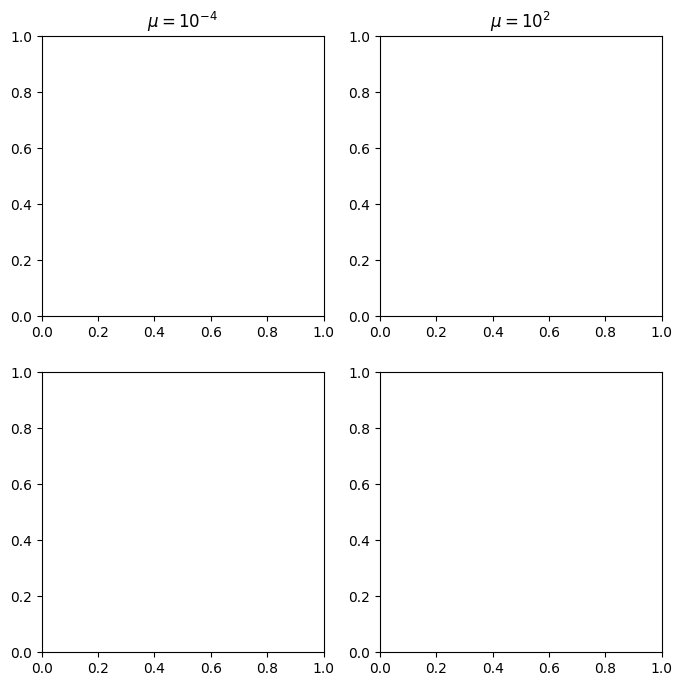

In [25]:
labels1 = ['$\Delta=10^{-3}\Delta_1^*$', '$\Delta=10^{-2}\Delta_1^*$','$\Delta=\Delta_1^*$','$\Delta=10^{5/2}\Delta_1^*$','$\Delta=10^3\Delta_1^*$']
# '$\Delta=10^{-1}\Delta_1^*$',
labels2 = ['$\Delta=\Delta^*/2$','$\Delta=\Delta^*$','$\Delta=2\Delta^*$','$\Delta=5\Delta^*$']


fig, axes = plt.subplots(2, 2, figsize=(8, 8))

fig.axes[0].set_title('$\mu=10^{-4}$')
fig.axes[1].set_title('$\mu=10^{2}$')


for i in range(len(deltas1)):
    fig.axes[0].scatter(sbins[i][:-1], shist_mu1[i], label=f'$\Delta={labels1[i]}$', marker = 'o') 
    fig.axes[2].scatter(tbins[i][:-1], thist_mu1[i], label=f'$\Delta={labels1[i]}$', marker = 'o')
for i in range(len(deltas2)):    
    fig.axes[1].scatter(sbins[i][:-1], shist_mu2[i], label=f'$\Delta={labels2[i]}$', marker = 'o')
    fig.axes[3].scatter(tbins[i][:-1], thist_mu2[i], label=f'$\Delta={labels2[i]}$', marker = 'o')

for i in range(4):
    fig.axes[i].set_xscale('log')
    fig.axes[i].set_yscale('log')

fig.supylabel('Probability distribution', fontsize=16)
fig.axes[0].set_xlabel('Cluster size $S$')
fig.axes[1].set_xlabel('Cluster size $S$')
fig.axes[2].set_xlabel('Cluster duration $T$')
fig.axes[3].set_xlabel('Cluster duration $T$')
fig.axes[0].legend(labels = labels1, loc = 'best', ncol = 2)
fig.axes[1].legend(labels = labels2, loc = 'best')

s_bins = np.logspace(0, 5, num = 100, base = 10)
y_s = s_bins**(-2)
y_s2 = s_bins**(-3/2)

t_bins = np.logspace(-2, 2, num = 100, base = 10)
y_t = t_bins**(-2) * 10**-3

fig.axes[0].plot(s_bins, y_s, color='black', linestyle='--')
fig.axes[0].plot(s_bins, y_s2, color='blue')
fig.axes[1].plot(s_bins, y_s, color='black', linestyle='--')
fig.axes[1].plot(s_bins, y_s2, color='blue')
fig.axes[2].plot(t_bins, y_t, color='black', linestyle='--')
fig.axes[3].plot(t_bins, y_t, color='black', linestyle='--')


fig.axes[3].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=3, linestyle='--')], labels=['$T^{-2}$'], loc = 'lower left', fontsize = 10)
#fig.axes[1].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=3, linestyle='--'),Line2D([0], [0], dashes=[2, 1], color='blue', linewidth=3)], labels=['$S^{-2}$', '$S^{-3/2}$'], loc = 'lower left', fontsize = 10)

#fig.axes[1].annotate(Line2D([0], [0], dashes=[2, 1], color='black', linewidth=3, linestyle='--') '$S^{-2}$')

fig.tight_layout()


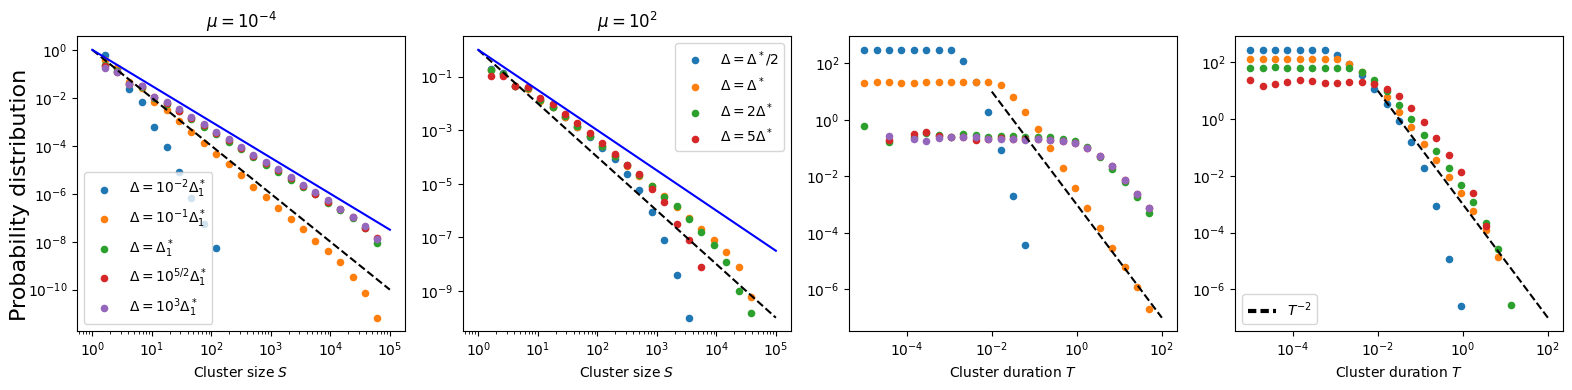

In [12]:
labels1 = ['$\Delta=10^{-2}\Delta_1^*$','$\Delta=10^{-1}\Delta_1^*$','$\Delta=\Delta_1^*$','$\Delta=10^{5/2}\Delta_1^*$','$\Delta=10^3\Delta_1^*$']
labels2 = ['$\Delta=\Delta^*/2$','$\Delta=\Delta^*$','$\Delta=2\Delta^*$','$\Delta=5\Delta^*$']


fig, axes = plt.subplots(1, 4, figsize=(16, 4))

fig.axes[0].set_title('$\mu=10^{-4}$')
fig.axes[1].set_title('$\mu=10^{2}$')


for i in range(len(deltas1)):
    fig.axes[0].scatter(sbins[i][:-1], shist_mu1[i], label=f'$\Delta={labels1[i]}$', marker = 'o', s = 20) 
    fig.axes[2].scatter(tbins[i][:-1], thist_mu1[i], label=f'$\Delta={labels1[i]}$', marker = 'o', s = 20)
for i in range(len(deltas2)):    
    fig.axes[1].scatter(sbins[i][:-1], shist_mu2[i], label=f'$\Delta={labels2[i]}$', marker = 'o', s = 20)
    fig.axes[3].scatter(tbins[i][:-1], thist_mu2[i], label=f'$\Delta={labels2[i]}$', marker = 'o', s = 20)

for i in range(4):
    fig.axes[i].set_xscale('log')
    fig.axes[i].set_yscale('log')

fig.supylabel('Probability distribution', fontsize=16)
fig.axes[0].set_xlabel('Cluster size $S$')
fig.axes[1].set_xlabel('Cluster size $S$')
fig.axes[2].set_xlabel('Cluster duration $T$')
fig.axes[3].set_xlabel('Cluster duration $T$')
fig.axes[0].legend(labels = labels1, loc = 'best')
fig.axes[1].legend(labels = labels2, loc = 'best')

s_bins = np.logspace(0, 5, num = 100, base = 10)
y_s = s_bins**(-2)
y_s2 = s_bins**(-3/2)

t_bins = np.logspace(-2, 2, num = 100, base = 10)
y_t = t_bins**(-2) * 10**-3

fig.axes[0].plot(s_bins, y_s, color='black', linestyle='--')
fig.axes[0].plot(s_bins, y_s2, color='blue')
fig.axes[1].plot(s_bins, y_s, color='black', linestyle='--')
fig.axes[1].plot(s_bins, y_s2, color='blue')
fig.axes[2].plot(t_bins, y_t, color='black', linestyle='--')
fig.axes[3].plot(t_bins, y_t, color='black', linestyle='--')


fig.axes[3].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=3, linestyle='--')], labels=['$T^{-2}$'], loc = 'lower left', fontsize = 10)
#fig.axes[1].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=3, linestyle='--'),Line2D([0], [0], dashes=[2, 1], color='blue', linewidth=3)], labels=['$S^{-2}$', '$S^{-3/2}$'], loc = 'lower left', fontsize = 10)

#fig.axes[1].annotate(Line2D([0], [0], dashes=[2, 1], color='black', linewidth=3, linestyle='--') '$S^{-2}$')

fig.tight_layout()


# Figuras con los datos de save data

In [27]:
data1 = ['10^-3', '10^-1', '10^-1', '','10^52','10^3']
data2 = ['0.5', '', '3', '5']

In [28]:
mu = 10**-4
sizes_mu1 = [np.load(f'./data/Sizes {data}Delta1 mu={mu}.npy') for data in data1]
times_mu1 = [np.load(f'./data/Times {data}Delta1 mu={mu}.npy') for data in data1]

mu = 10**2
sizes_mu2 = [np.load(f'./data/Sizes {data}Delta1 mu={mu}.npy') for data in data2]
times_mu2 = [np.load(f'./data/Times {data}Delta1 mu={mu}.npy') for data in data2]

In [29]:
sbins = [np.logspace(0, 4, num = 40, base = 10), 
         np.logspace(0, 5, num = 40, base = 10), 
         np.logspace(0, 5, num = 40, base = 10), 
         np.logspace(0, 5, num = 40, base = 10), 
         np.logspace(0, 5, num = 40, base = 10), 
         np.logspace(0, 5, num = 40, base = 10)]
tbins = [np.logspace(-4, 0, num = 40, base = 10), 
         np.logspace(-4, 2, num = 40, base = 10), 
         np.logspace(-4, 2, num = 40, base = 10), 
         np.logspace(-4, 2, num = 40, base = 10), 
         np.logspace(-4, 2, num = 40, base = 10), 
         np.logspace(-4, 2, num = 40, base = 10)]

In [30]:
shist_mu1 = [np.histogram(s, density= True, bins=sbins[i])[0] for i, s in enumerate(sizes_mu1)]
shist_mu2 = [np.histogram(s, density= True, bins=sbins[i])[0] for i, s in enumerate(sizes_mu2)]
thist_mu1 = [np.histogram(t, density= True, bins=tbins[i])[0] for i, t in enumerate(times_mu1)]
thist_mu2 = [np.histogram(t, density= True, bins=tbins[i])[0] for i, t in enumerate(times_mu2)]

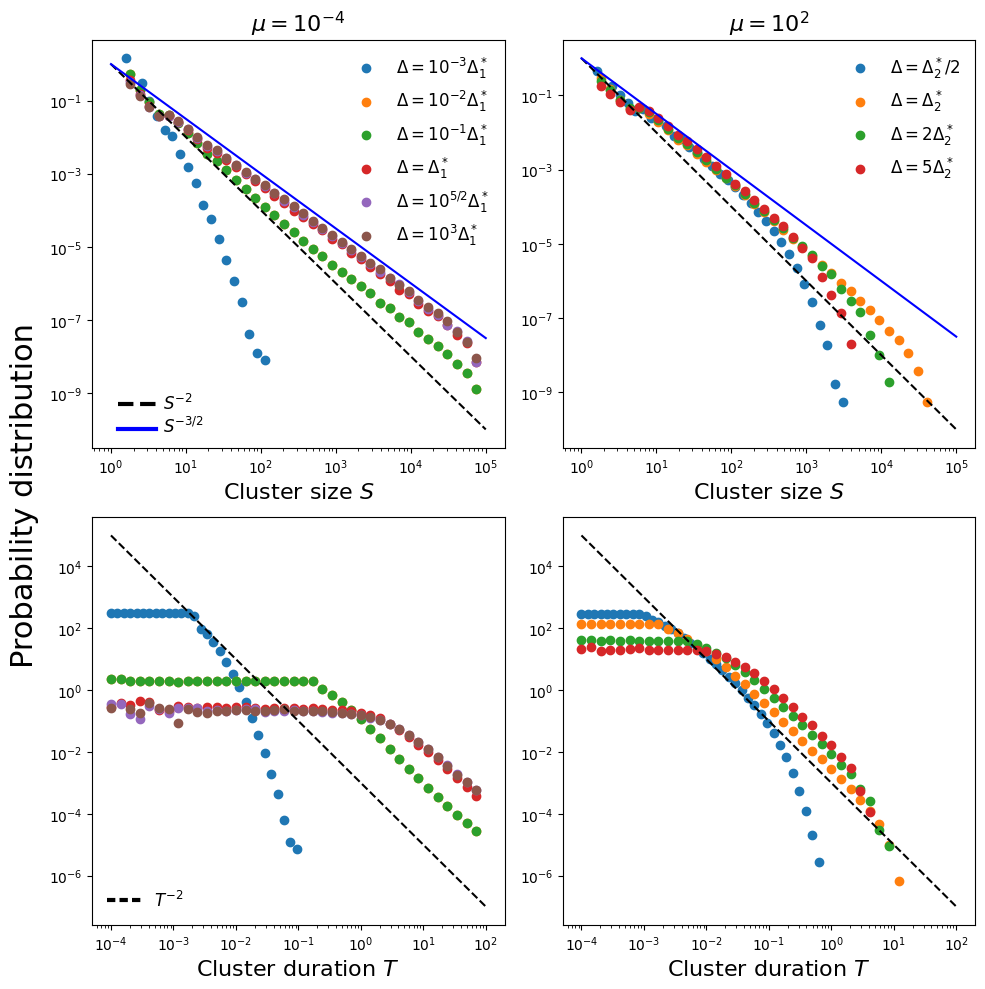

In [77]:
labels1 = ['$\Delta = 10^{-3}\Delta_1^*$', '$\Delta = 10^{-2}\Delta_1^*$', '$\Delta = 10^{-1}\Delta_1^*$', '$\Delta = \Delta_1^*$', '$\Delta = 10^{5/2}\Delta_1^*$', '$\Delta = 10^3\Delta_1^*$']
labels2 = ['$\Delta = \Delta^*_2/2$', '$\Delta = \Delta^*_2$', '$\Delta = 2\Delta^*_2$', '$\Delta = 5\Delta^*_2$']

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

fig.axes[0].set_title('$\mu=10^{-4}$', fontsize = 16)
fig.axes[1].set_title('$\mu=10^{2}$', fontsize = 16)


for i in range(len(data1)):
    fig.axes[0].scatter(sbins[i][:-1], shist_mu1[i], label=f'{labels1[i]}', marker = 'o') 
    fig.axes[2].scatter(tbins[i][:-1], thist_mu1[i], label=f'{labels1[i]}', marker = 'o')
    
for i in range(len(data2)):
    fig.axes[1].scatter(sbins[i][:-1], shist_mu2[i], label=f'\Delta={labels2[i]}', marker = 'o')
    fig.axes[3].scatter(tbins[i][:-1], thist_mu2[i], label=f'\Delta={labels2[i]}', marker = 'o')

for i in range(4):
    fig.axes[i].set_xscale('log')
    fig.axes[i].set_yscale('log')

fig.supylabel('Probability distribution', fontsize=22)
fig.axes[0].set_xlabel('Cluster size $S$', fontsize = 16)
fig.axes[1].set_xlabel('Cluster size $S$', fontsize = 16)
fig.axes[2].set_xlabel('Cluster duration $T$', fontsize = 16)
fig.axes[3].set_xlabel('Cluster duration $T$', fontsize = 16)
fig.axes[0].legend(labels = labels1, loc = 'upper right', fontsize = 12, ncol = 1, frameon = False)

s_aux = np.logspace(0, 5, num = 100, base = 10)
y_s = s_aux**(-2)
y_s2 = s_aux**(-3/2)
t_aux = np.logspace(-4, 2, num = 100, base = 10)
y_t = t_aux**(-2) * 10**-3

fig.axes[0].plot(s_aux, y_s, color='black', linestyle='--')
fig.axes[0].plot(s_aux, y_s2, color='blue')
fig.axes[1].plot(s_aux, y_s, color='black', linestyle='--')
fig.axes[1].plot(s_aux, y_s2, color='blue')
fig.axes[2].plot(t_aux, y_t, color='black', linestyle='--')
fig.axes[3].plot(t_aux, y_t, color='black', linestyle='--')
fig.axes[1].legend(labels = labels2, loc = 'best', fontsize = 12, ncol = 1, frameon = False)

fig.axes[2].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=3, linestyle='--')], labels=['$T^{-2}$'], loc = 'lower left', fontsize = 12, frameon = False)
#fig.axes[1].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=3, linestyle='--')], labels=['$S^{-2}$'], loc = 'lower left', fontsize = 12)


fig.axes[0].annotate('$S^{-2}$', xy=(3.2, 1.5E-10), xycoords='data', xytext=(10, 10), textcoords='offset points', fontsize=12)
fig.axes[0].plot(np.logspace(0.1, 0.6, 10), np.ones(10)*5E-10, color='black', linestyle='--', lw = 3)

fig.axes[0].annotate('$S^{-3/2}$', xy=(3.2, 0.35E-10), xycoords='data', xytext=(10, 10), textcoords='offset points', fontsize=12)
fig.axes[0].plot(np.logspace(0.1, 0.6, 10), np.ones(10)*1E-10, color='blue', linestyle='-', lw = 3)

fig.tight_layout()